<a href="https://colab.research.google.com/github/reireu/for-copy/blob/main/dae_bayes04_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データと計量経済学 第4回 確率の数式表現から正規分布まで

## 参考文献
- Pythonでスラスラわかるベイズ推論「超」入門
    - https://www.kspub.co.jp/book/detail/5337639.html
- 【数学溢れ話】【Token】ベン図(Venn Diagram)と組み合わせ計算(Combination Calculation)と確率演算(Probability Operation) #Python - Qiita
    - https://qiita.com/ochimusha01/items/367d306d062bfbda4a6d

In [7]:
# pip install matplotlib matplotlib-venn
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=1fdb4c1013d28db4b4bcee3f5736d5c9063ba2a7fac48f042417f613cdda083e
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [8]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

from scipy.stats import norm


# randomに値を生成するライブラリ
import random


## 確率の基本


確率の基本的な数式と記法について解説します。これを理解することで、条件付き確率やベイズの定理といった応用的な概念にもつながります。

---

### 確率の基本的な定義

確率とは、ある事象が起こる可能性を数値で表したものです。基本的には次の公式で定義されます：

$$
P(A) = \frac{\text{事象 } A \text{ が起こる場合の数}}{\text{全ての場合の数}}
$$



---
### 記法の意味

1. **事象 A :**  
   ある特定の結果や出来事を表します。  
   例: サイコロを振ったとき、「出た目が 6 である」という事象。

2. **確率 P(A) :**  
   事象 A  が起こる確率を意味します。$P(A)$全体で数値になります。 \
   PはProbability(確率)のPです。 \
   例: サイコロを振ったとき、出た目が 6 である確率は $P(A) = \frac{1}{6}$ 。

3. **全体の確率の範囲:**  
   確率は常に次の範囲に収まります：  
   $$
   0 \leq P(A) \leq 1
   $$  

   - $P(A) = 0$ : A  が絶対に起こらない。  
   - $P(A) = 1$ : A  が確実に起こる。

- 補足
   - 関数を表す$f(x)$みたいな表記のときに、fの部分はgになったりといろんな文字を使うことができますが、確率のP(なんちゃら)というのは、いつもP(なんちゃら)です。


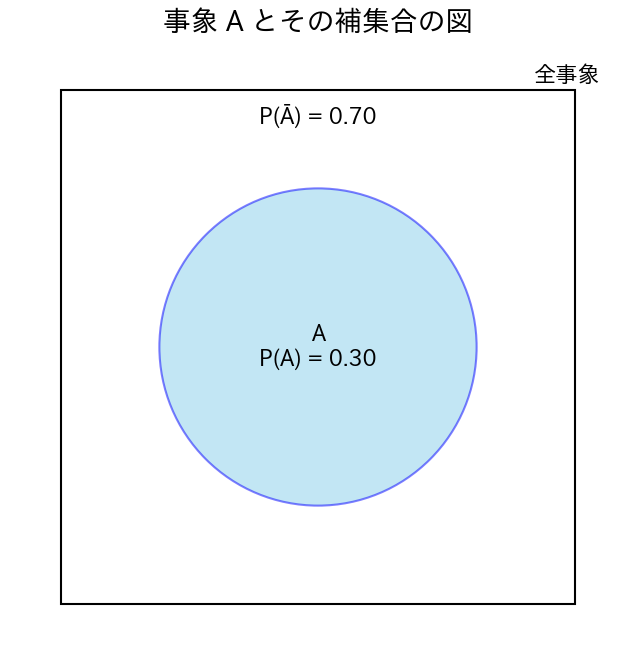

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import math

def plot_event_A(P_A):
    """
    事象 A の確率を受け取り、A の面積が確率に比例する図を描く関数。

    Parameters:
    P_A (float): 事象 A の確率（0 < P_A < 1）
    """
    if not (0 < P_A < 1):
        raise ValueError("P_A は 0 と 1 の間の値でなければなりません。")

    P_not_A = 1 - P_A  # 事象 A の補集合の確率

    # Figure と Axes オブジェクトを作成
    fig, ax = plt.subplots(figsize=(8,8))  # 正方形の図形にするためサイズを調整

    # 全事象を表す長方形を描画
    universal_set = Rectangle((0, 0), width=10, height=10, linewidth=1.5,
                              edgecolor='black', facecolor='none')
    ax.add_patch(universal_set)

    # 円の半径を計算（面積が P_A に比例するように）
    # スケール係数を適用して視覚的にわかりやすいサイズに調整
    scale_factor = math.sqrt(100 / math.pi)  # 全事象のエリアを 100 と仮定
    radius = math.sqrt(P_A) * scale_factor

    # 事象 A を表す円を描画（円の中心は長方形の中央に配置）
    event_A = Circle((5, 5), radius=radius, linewidth=1.5,
                     edgecolor='blue', facecolor='skyblue', alpha=0.5)
    ax.add_patch(event_A)

    # ラベルの追加
    # 全事象のラベル
    ax.text(10.5, 10.5, '全事象', fontsize=16, ha='right', va='top')

    # 事象 A のラベルと確率
    ax.text(5, 5, f'A\nP(A) = {P_A:.2f}', fontsize=16, ha='center', va='center')

    # 事象 A の補集合の確率を表示（円の外側の領域に）
    ax.text(5, 9.5, f'P(Ā) = {P_not_A:.2f}', fontsize=16, ha='center', va='center')

    # 軸の範囲を設定
    margin = 1
    ax.set_xlim(0 - margin, 10 + margin)
    ax.set_ylim(0 - margin, 10 + margin)

    # 軸のアスペクト比を等倍に設定
    ax.set_aspect('equal', adjustable='box')

    # 軸を非表示に
    ax.axis('off')

    # タイトルを追加
    ax.set_title('事象 A とその補集合の図', fontsize=20)

    # 図の表示
    plt.show()

plot_event_A(0.3)

---
### 確率の基本法則

#### 1. **加法の法則（排反事象）**  
事象 A  と B  が互いに重ならない場合（排反事象）、そのどちらかが起こる確率は次のように計算されます：
$$
P(A \cup B) = P(A) + P(B)
$$
例: サイコロを振ったとき、「出た目が 2 か 4」の確率は：
$$
P(\text{2または4}) = P(\text{2}) + P(\text{4}) = \frac{1}{6} + \frac{1}{6} = \frac{1}{3}
$$


#### 2. **積法の法則（独立事象）**  
事象 A  と B  が互いに独立している場合、その両方が起こる確率は：
$$
P(A \cap B) = P(A) \cdot P(B)
$$
例: コインを2回投げたとき、1回目と2回目が表になる確率は：
$$
P(\text{表1回目} \cap \text{表2回目}) = P(\text{表1回目}) \cdot P(\text{表2回目}) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}
$$

#### 3. **全確率の和**  
全ての可能な事象の確率の和は 1 に等しくなります：
$$
\sum_{i} P(A_i) = 1
$$
例: サイコロを振ったとき、「出た目が 1, 2, 3, 4, 5, 6」の確率をすべて足すと：
$$
P(\text{1}) + P(\text{2}) + \cdots + P(\text{6}) = 1
$$

### 排反であることのベン図での表現




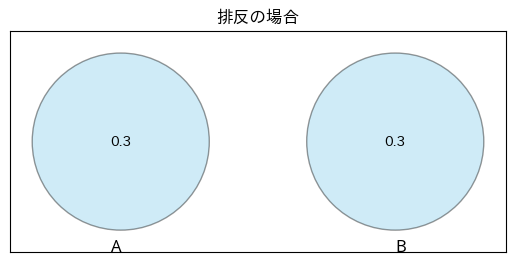

In [10]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

def haihan(namelist,valuelist):
    nameA = namelist[0]
    nameB = namelist[1]
    a1 = valuelist[0]
    a2 = valuelist[1]
    # 重なる部分の領域の割合を0にする
    v = venn2(subsets=(a1, a2, 0),set_labels = (nameA, nameB))

    # ベン図の色を変更する
    v.get_patch_by_id('10').set_color('skyblue')
    v.get_patch_by_id('10').set_edgecolor('black')
    v.get_patch_by_id('01').set_color('skyblue')
    v.get_patch_by_id('01').set_edgecolor('black')

    # 背景色を変更する
    plt.gca().set_axis_on()
    plt.gca().set_facecolor('white')
    plt.title("排反の場合")
    plt.show()

haihan(['A','B'],[0.3,0.3])


### 排反でないことのベン図での表現

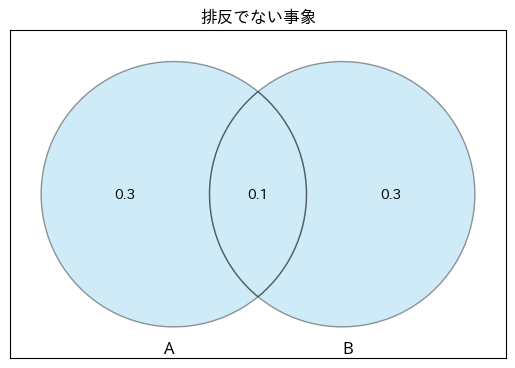

In [11]:
def non_haihan(a,b,c, title="排反でない事象"):
    # 重なる部分の領域の割合を1にする
    v = venn2(subsets=(a, b, c),set_labels = ('A', 'B'))

    # ベン図の色を変更する
    v.get_patch_by_id('10').set_color('skyblue')
    v.get_patch_by_id('10').set_edgecolor('black')
    v.get_patch_by_id('11').set_color('skyblue')
    v.get_patch_by_id('11').set_edgecolor('black')
    v.get_patch_by_id('01').set_color('skyblue')
    v.get_patch_by_id('01').set_edgecolor('black')

    # 背景色を変更する
    plt.gca().set_axis_on()
    plt.gca().set_facecolor('white')
    plt.title(title)
    plt.show()

non_haihan(0.3,0.3, 0.1)

---

### 応用に向けた基本的概念

- **補集合 $A^c$ :**  
  A  が起こらない確率。次の式で表されます：  
  $$
  P(A^c) = 1 - P(A)
  $$  
  例: サイコロを振ったとき、「出た目が 6 以外」の確率は：
  $$
  P(A^c) = 1 - P(A) = 1 - \frac{1}{6} = \frac{5}{6}
  $$

  補集合を表す記号として、集合 A の上にバー（線）を引いて $\overline{A}$ と書く方法もあります。
  - 集合 $A$ の補集合 : $\overline{A}$
  - 補集合 $\overline{A}$の起こる確率 : $P(\overline{A})$



- **共通部分 $A \cap B$ :**  
  A  と B  の両方が起こる確率。これを用いると条件付き確率やベイズの定理に繋がります。


---

### 実例で基本を確認

1. **サイコロ問題**  
サイコロを振って「偶数が出る確率 $P(A)$ 」を求める：
$$
P(A) = \frac{\text{偶数の目（2, 4, 6）の数}}{\text{全ての目の数（1, 2, 3, 4, 5, 6）}} = \frac{3}{6} = \frac{1}{2}
$$

2. **コイン問題**  
コインを投げたとき「表が出る確率 $P(A)$ 」：
$$
P(A) = \frac{\text{表の出る場合の数（1つ）}}{\text{全ての面の数（表と裏で2つ）}} = \frac{1}{2}
$$

---

これが確率の基本です。この土台をもとに、条件付き確率や期待値といった発展的な概念を学んでいくことができます！

----
### 問1 確率の式をMakrdownで書いてみよう
----


- 数式の書き方は2種類。どちらも$を使う。
    - 行の中で書く場合($一つで囲う) :
        ```
        $数式$
        ```
    - 独立した行として書く場合($２つで囲う) :
        ```
        $$
        数式
        $$
        ```

- TeXの記法が使える。
    - `\`(バックスラッシュ)の後に予約語を書くことで特別な記号が出せる。
        - `\cup`で$\cup$
        - `\cap`で$\cap$
        - `\frac{a}{b}`で$\frac{a}{b}$
        - `a, \ldots, b`で$a, \ldots, b$
        - `a+ \ldots+ b`で$a+ \ldots+ b$
    - 上付き文字・下付き文字
        - `a^b`で$a^b$
        - `a_b`で$a_b$


- 再現するもの
    - $P(A)$
    - $P(A \cup B)$
    - $P(A \cap B)$
    - $(x_1, x_2, \ldots , x_n)$
    - $(a_1 + a_2 + \cdots +z_n)$

    $$
    P(A^c) = 1 - P(A) = 1 - \frac{1}{6} = \frac{5}{6}
    $$

### 排反でないときの確率の加法

確率の計算において、2つ以上の事象が同時に起こる可能性がある場合、つまり**排反でない事象**の場合には、単純に各事象の確率を足し合わせるだけでは正しい結果が得られません。ここでは、排反でない事象の確率の加法について、ベン図や数式を用いて解説し、具体的な例を示します。

---

#### **1. 基本的な考え方**

**確率の加法定理（一般化）**：

2つの事象 A と B があるとき、A または B が起こる確率 P(A ∪ B) は次のように表されます。

$$
P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
$$

- **P(A)**：事象 A が起こる確率
- **P(B)**：事象 B が起こる確率
- **P(A ∩ B)**：事象 A と B が**同時に**起こる確率

**ポイント**：

- **排反な事象**の場合（A と B が同時に起こらない）、P(A ∩ B) = 0 となり、式は P(A ∪ B) = P(A) + P(B) に簡略化されます。
- **排反でない事象**の場合、同時に起こる可能性があるため、P(A ∩ B) を引いて重複部分を調整します。

---


#### **2. ベン図による視覚的な説明**

以下のベン図は、排反でない事象 A と B の関係を示しています。

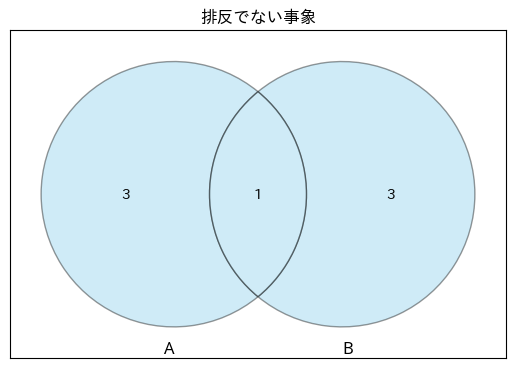

In [12]:
non_haihan(3,3,1)

- **全体の長方形**：全事象（全ての可能性）
- **円 A**：事象 A が起こる領域
- **円 B**：事象 B が起こる領域
- **重なり部分（A ∩ B）**：事象 A と B が同時に起こる領域

**解説**：

- P(A) と P(B) を単純に足すと、重なり部分（A ∩ B）が二重に数えられます。
- そのため、P(A ∩ B) を引いて重複を取り除きます。



---

#### **3. 例：トランプを用いた例**

**問題**：

52枚のトランプから1枚のカードを引くとき、それが「スペード」または「エース」である確率は？

**解答**：

1. **事象の定義**：

   - **A**：カードがスペードである
   - **B**：カードがエースである

2. **それぞれの確率**：

   - **P(A)**：スペードは13枚
     $$
     P(A) = \frac{13}{52} = \frac{1}{4}
     $$
   - **P(B)**：エースは4枚
     $$
     P(B) = \frac{4}{52} = \frac{1}{13}
     $$
   - **P(A ∩ B)**：スペードのエースは1枚
     $$
     P(A ∩ B) = \frac{1}{52}
     $$

3. **式に当てはめて計算**：

   $$
   \begin{align*}
   P(A ∪ B) &= P(A) + P(B) - P(A ∩ B) \\
   &= \frac{1}{4} + \frac{1}{13} - \frac{1}{52} \\
   &= \frac{13}{52} + \frac{4}{52} - \frac{1}{52} \\
   &= \frac{16}{52} \\
   &= \frac{4}{13}
   \end{align*}
   $$

**答え**：

カードが「スペード」または「エース」である確率は $\frac{4}{13}$ です。


---
#### **4. ベン図での視覚的な確認**

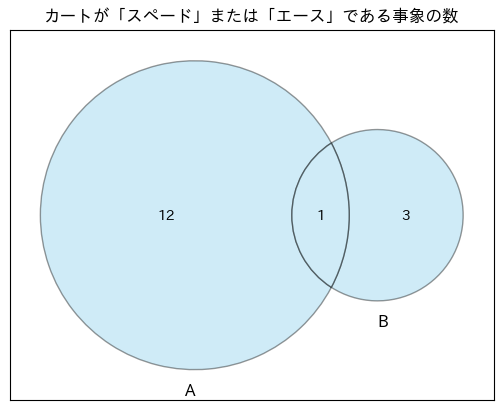

In [13]:
non_haihan(12,3,1, title='カートが「スペード」または「エース」である事象の数')


- **円 A（スペード）**：13枚のスペードのカード
- **円 B（エース）**：4枚のエース
- **重なり部分（スペードのエース）**：1枚

**解説**：

- P(A) と P(B) を足すと、スペードのエースが二重に数えられるため、P(A ∩ B) を引いて調整します。



----
### 問2 排反でないときの確率の加法の計算

----



- 以下の問いを考えます。
    - 52枚のトランプから1枚のカードを引くとき、それが「ハート」または「絵札」である確率は？

- Markdownで計算の過程を書いてみましょう(上の例を参考に)

ここに書く

In [14]:
## 計算が必要ならここでpythonでやる

## 確率変数

確率変数（かくりつへんすう）は、確率論や統計学における基本的な概念であり、偶然に起こる現象を数値で表現するために用いられます。具体的には、**試行の結果を数値に対応付ける関数**として定義されます。この関数は、結果が起こる確率と、それに対応する数値を組み合わせて、数学的な解析を可能にします。


**確率的な事象に数値を対応させたもの**と考えるとよいでしょう。

---

### **確率変数の定義**

確率空間 $(\Omega, \mathcal{F}, P)$ が与えられているとき、**確率変数** $X$ は次の条件を満たす関数です：

- **可測関数**：$X: \Omega \rightarrow \mathbb{R}$ （$\mathbb{R}$ は実数全体の集合）であり、任意の実数 $x$ に対して、
  $$
  \{ \omega \in \Omega \mid X(\omega) \leq x \} \in \mathcal{F}
  $$
  が成立します。

つまり、確率変数 $X$ は確率空間の元（試行の結果）に数値を対応させ、その数値に基づく事象が確率的に定義可能であることを意味します。

---

### **確率変数の役割と目的**

1. **事象の数値化**：

   - 複雑な事象を数値に置き換えることで、統計的・数学的な手法を適用できます。
   - 確率分布や統計量（平均、分散、標準偏差など）を計算する基盤となります。

2. **情報の集約**：

   - 試行の結果を単一の数値で表現することで、大量のデータを扱いやすくします。
   - データの特徴や傾向を把握しやすくなります。

3. **確率モデルの構築**：

   - 確率変数を用いて、現象をモデル化し、予測や推定を行うことができます。

---

### **具体例**

#### **例1：サイコロの出目**

- **試行**：6面体のサイコロを1回投げる。

- **確率空間**：
  $$
  \Omega = \{1, 2, 3, 4, 5, 6\}
  $$

- **確率変数 $X$**：
  - サイコロの出た目そのものを確率変数とする。
  - 定義：$X(\omega) = \omega$
  - これは各試行結果に対して、そのままの数値を対応させています。

---

#### **例2：コイン投げの表の回数**

- **試行**：コインを3回投げる。

- **確率空間**：
  $$
  \Omega = \{(H, H, H), (H, H, T), (H, T, H), (H, T, T), (T, H, H), (T, H, T), (T, T, H), (T, T, T)\}
  $$
  （ここで、$H$ は表、$T$ は裏を表します）

- **確率変数 $X$**：
  - 「表が出た回数」を表す。
  - 例えば、$\omega = (H, T, H)$ のとき、$X(\omega) = 2$



---

### 離散型確率変数と連続型確率変数

確率変数は、その取り得る値の性質により、以下の2種類に分類されます。

1. **離散型確率変数**：
   - **定義**：取り得る値が**個々の離散的な値**であり、その数が有限または可算無限個であるもの。
   - **例**：
     - サイコロを振ったときの出目（1から6）
     - コイン投げで表か裏が出る（表を0、裏を1と数値化）
     - 試験で正答した問題の数

2. **連続型確率変数**：
   - **定義**：取り得る値が**連続的な範囲**を持ち、数直線上の区間内の任意の値を取り得るもの。
   - **例**：
     - 身長や体重といった身体的な測定値
     - 一定期間内の気温や降水量
     - 製品の寿命や故障までの時間



---

### **確率分布**

確率変数の取り得る値とそれぞれの確率の対応関係を表したものを**確率分布**と呼びます。

- **離散型確率変数の場合**：
  - **確率質量関数**(PMF：Probability Mass Function) を用いて、各値が取る確率を定義します。
  - 式で表すと、$$ P(X = x_i) = p_i $$ となり、全ての確率の総和は1になります。

- **連続型確率変数の場合**：
  - **確率密度関数**(PDF：Probability Density Function)を用いて、値の範囲に対する確率を定義します。
  - ある区間 $[a, b]$ において確率は、$$ P(a \leq X \leq b) = \int_a^b f(x) \, dx $$ と積分により計算されます。これも全ての確率の総和は1になります。


---

### **累積分布関数（CDF：Cumulative Distribution Function）**

累積分布関数は、確率変数がある値以下になる確率を示す関数です。

- **定義**：$$ F(x) = P(X \leq x) $$
- **性質**：
  - 単調非減少関数であり、$ \lim_{x \to -\infty} F(x) = 0 $、$ \lim_{x \to \infty} F(x) = 1 $ を満たします。
  - 任意の区間の確率は、累積分布関数の差で表せます。
    - 例：$$ P(a < X \leq b) = F(b) - F(a) $$

---

### **期待値と分散**

確率変数の特性を数値的に要約するために、**期待値**と**分散**が用いられます。

- **期待値（平均値）**：
  - **離散型**：$ E[X] = \sum x_i \cdot P(X = x_i) $
  - **連続型**：$ E[X] = \int_{-\infty}^\infty x \cdot f(x) \, dx $

- **分散**：
  - **定義**：期待値からの偏差の2乗の平均。
  - **離散型**：$ Var(X) = \sum (x_i - E[X])^2 \cdot P(X = x_i) $
  - **連続型**：$ Var(X) = \int_{-\infty}^\infty (x - E[X])^2 \cdot f(x) \, dx $

- **標準偏差**：
  - 分散の平方根であり、$ \sigma = \sqrt{Var(X)} $ と表されます。

---

### **具体例：サイコロの出目**

**問題設定**：6面体の公正なサイコロを1回振る。

- **確率変数 $X$**：出た目の数値。
- **取り得る値**：1, 2, 3, 4, 5, 6
- **確率質量関数**：$$ P(X = k) = \frac{1}{6} \quad (k = 1, 2, 3, 4, 5, 6) $$

**期待値の計算**：
$$
\begin{align*}
E[X] &= \sum_{k=1}^6 k \cdot P(X = k) \\
&= \frac{1+2+3+4+5+6}{6} \\
&= \frac{21}{6} = 3.5
\end{align*}
$$

**分散の計算**：
$$
\begin{align*}
Var(X) &= \sum_{k=1}^6 (k - E[X])^2 \cdot P(X = k) \\
&= \frac{(1 - 3.5)^2 + (2 - 3.5)^2 + \dots + (6 - 3.5)^2}{6} \\
&= \frac{17.5}{6} \approx 2.9167
\end{align*}
$$

## 条件付確率

### 条件付き確率とは？

条件付き確率は、ある出来事 B  が起きたという前提のもとで、別の出来事 A  が起きる確率を表します。この確率は、全体の確率空間を B  が起きた場合に限定して考えます。

---

### 条件付き確率の数式（Markdown形式）

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)} \quad (P(B) > 0)
$$

---

### 各項の意味

- $P(A \mid B)$ :  B  が起きた条件下で、A が起きる確率。
- $P(A \cap B)$ :  A  と  B の両方が同時に起きる確率（共通部分の確率）。
- $P(B)$ : B  が起きる確率。

---

### 条件付き確率のポイント

1. **分母 $P(B)$ **  
   条件を課す基準である  B の確率。これは全体の中で B が発生する割合を示します。

2. **分子 $P(A \cap B)$ **  
   A と B が同時に発生する確率。条件付き確率では、これを B の中での A の発生割合と考えます。

---

### 条件付き確率の直感的理解

- $P(A \mid B)$ は、全体の中で A が発生する割合ではなく、条件として与えられた B の中での A の発生割合です。
- 例えるなら、全体の中で赤いボールを引く確率ではなく、「箱に青いラベルが付いている」箱から赤いボールを引く確率のようなものです。

---

### 応用例

#### 1. **天気予報**  
「雨が降る確率」ではなく、「曇っているときに雨が降る確率」を考える。

- A : 雨が降る
- B : 曇っている

この場合、曇りであることを前提として、雨が降る確率を計算します。

---

#### 2. **カードゲーム**  
トランプの山札から引いたカードが「絵札である」という条件のもとで、それが「ハート」である確率を求める。

- A : カードがハート
- B : カードが絵札

分子は「ハートの絵札の枚数」、分母は「全体の絵札の枚数」に相当します。

---

### 条件付き確率とベイズの定理の関係

条件付き確率は、ベイズの定理の基礎概念として利用されます。ベイズの定理では、条件付き確率を逆転して計算する方法を提供します。両者を理解することで、確率をより柔軟に扱えるようになります。

以下に、条件付き確率を求めるための計算問題をいくつか作成しました。各問題にはヒントも含めています。

---

### 問題 3-1: サイコロを使った問題

サイコロを1回振ります。  
- A : 出た目が偶数である（2, 4, 6）。  
- B : 出た目が 4 以上である（4, 5, 6）。  

条件付き確率 $P(A \mid B)$  を求めなさい。

**ヒント:**  
1. 分母 $P(B)$  を求めるには、B  の事象の数を全事象の数で割ります。  
2. 分子 $P(A \cap B)$  を求めるには、A  と B  の両方を満たす目の数を考えます。

---

### 問題 3-2: カードを引く問題

52枚のトランプから1枚をランダムに引きます。  
- A : 引いたカードがハートである。  
- B : 引いたカードが絵札（ジャック、クイーン、キング）である。  

条件付き確率 $P(A \mid B)$  を求めなさい。

**ヒント:**  
1. $A \cap B$  は「ハートの絵札」であり、その枚数を数えます。  
2. B  は「全ての絵札」であり、その枚数を数えます。

---

### 問題 3-3: 天気予報

ある都市で観測されたデータによると、次の情報があります：  
- 雨が降る確率 P(R) = 0.3 。  
- 曇っている確率 P(C) = 0.5 。  
- 雨が降っているときに曇っている確率$P(C \mid R)$ = 0.8 。  

雨が降っている条件下で曇っている確率を用いて、曇っているときに雨が降っている確率 $P(R \mid C)$  を求めなさい。

**ヒント:**  
ベイズの定理を利用して計算します：
$$
P(R \mid C) = \frac{P(C \mid R) P(R)}{P(C)}
$$

---

### 問題 3-4: 製品の不良率

ある工場で製品を検査したところ、以下のデータが得られました：  
- 全製品のうち 10% が不良品（事象 F ）。  
- 不良品のうち 80% は機械1で製造された（事象 M \mid F ）。  
- 全製品のうち 60% は機械1で製造された（事象 M ）。  

機械1で製造された製品が不良品である確率 P(F \mid M)  を求めなさい。

**ヒント:**  
1. $P(F \cap M) = P(M \mid F) P(F)$  を利用して共通確率を求める。  
2. $P(F \mid M) = \frac{P(F \cap M)}{P(M)}$  を用いる。

---

### 問題 3-5: 学校の試験

あるクラスで、次の情報が与えられています：  
- 試験に合格する確率 P(A) = 0.7 。  
- 特定の参考書を利用して勉強した確率 P(B) = 0.5 。  
- 参考書を利用して勉強した学生が試験に合格する確率 P(A \mid B) = 0.9 。  

参考書を利用していない学生が試験に合格する確率 P(A \mid B^c)  を求めなさい。

**ヒント:**  
1. 全体の合格確率 P(A)  を条件付き確率の加法定理で分解：  
$$
P(A) = P(A \mid B)P(B) + P(A \mid B^c)P(B^c)
$$
2. 上式を用いて P(A \mid B^c)  を計算します。


## ベイズの定理

### ベイズの定理とは？

ベイズの定理は、条件付き確率を計算するための公式で、ある出来事 A  が起こったときに、別の出来事 B  が起こる確率を求める際に利用されます。この定理は、既知の情報をもとに新しい情報が得られた場合に確率を更新する手法として広く使われています。

---

### ベイズの定理の数式（Markdown形式）

$$
P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}
$$

---

### 各項の意味

- $P(A \mid B)$ : B  が起きたという条件のもとで、A  が起きる確率（事後確率）
- $P(B \mid A)$ : A  が起きたときに B  が起きる確率（尤度）
- $P(A)$ : A  が起きる確率（事前確率）
- $P(B)$ : B  が起きる確率（正規化項）

---

### ベイズの定理のポイント

1. 事前確率 $P(A)$  
   事象 A  が発生する確率。元々の仮説や事象に対する初期の信頼度。

2. 尤度 $P(B \mid A)$
   仮説 A  のもとで観測データ B  が得られる確率。

3. 事後確率 $P(A \mid B)$
   観測データ B  を考慮した上で、仮説 A  が正しい確率。

4. 正規化項 $P(B)$  
   事象 B  が起きる全体的な確率。すべての可能性を考慮して事後確率を正規化するために必要。

---

### 応用例

#### 1. **医療診断**  
病気 A  の確率を検査結果 B  に基づいて更新する。

- P(A) : 事前確率（病気の発生率）
- P(B \mid A) : 病気があるときに陽性となる確率（検査の感度）
- P(B) : 検査が陽性になる確率（病気の有無を考慮した全体の陽性率）

#### 2. **スパムメールフィルタリング**  
メールがスパム A  である確率を、メール内の単語の出現 B  に基づいて計算する。

---

### ベイズの定理の直感的理解

- ベイズの定理は「新しい証拠 B  を得る前後で、仮説 A  の信頼度をどのように更新するか」を教えてくれます。
- 元の信頼度（事前確率）を、観測されたデータ（尤度）で修正して、最終的な信頼度（事後確率）を計算します。

これにより、得られたデータに基づいてより正確な予測や推論を行うことが可能になります。

## 正規分布

**正規分布について**

正規分布は、統計学や確率論で最も重要な連続型確率分布の一つです。多くの自然現象や測定値が正規分布に従うとされています。

確率密度関数（PDF）は次の式で表されます：

$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp{\left( -\frac{(x - \mu )^2}{2\sigma^2} \right)}
$$

- $\mu$：平均値（期待値）
- $\sigma^2$：分散

### 正規分布の特徴

- **左右対称性**：平均値 $\mu$ を中心にグラフが左右対称になります。
- **単峰性**：平均値の位置で最大値を持つ鐘形の曲線です。
- **中心極限定理**：独立した複数の確率変数の合計は、分布の種類に関わらず正規分布に近づきます。


### 確率密度関数（PDF）のプロット

平均値 $\mu = 0$、標準偏差 $\sigma = 1$ の標準正規分布の確率密度関数を描画します。


In [15]:

# 平均と標準偏差の設定
mu = 0      # 平均値
sigma = 1   # 標準偏差

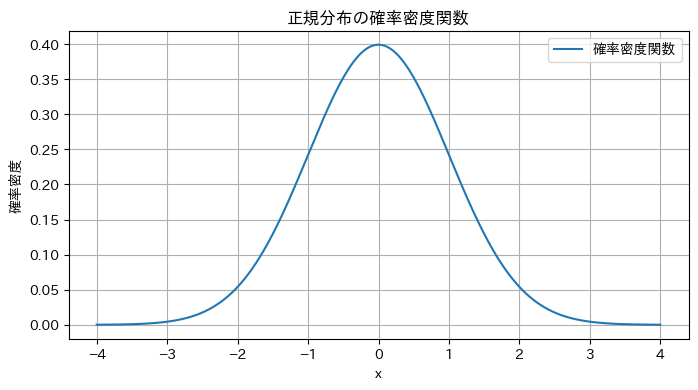

In [16]:
# xの範囲を設定
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# 確率密度関数を計算
pdf = norm.pdf(x, mu, sigma)

# グラフの描画
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='確率密度関数')
plt.title('正規分布の確率密度関数')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.legend()
plt.grid(True)
plt.show()



### 累積分布関数（CDF）のプロット

累積分布関数は、ある値以下の確率を示します。



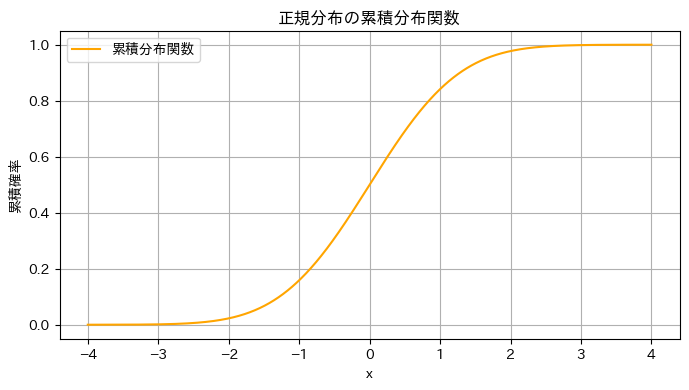

In [17]:
# 累積分布関数を計算
cdf = norm.cdf(x, mu, sigma)

# グラフの描画
plt.figure(figsize=(8, 4))
plt.plot(x, cdf, label='累積分布関数', color='orange')
plt.title('正規分布の累積分布関数')
plt.xlabel('x')
plt.ylabel('累積確率')
plt.legend()
plt.grid(True)
plt.show()

### 特定の範囲の確率を計算

例えば、$x = -1$ から $x = 1$ の間に値が存在する確率を計算します。

In [18]:
# x = -1 から x = 1 の間の確率
prob_between = norm.cdf(1, mu, sigma) - norm.cdf(-1, mu, sigma)
print(f"平均 {mu}, 標準偏差 {sigma} の正規分布で、xが-1から1の範囲にある確率は {prob_between:.4f} です。")

平均 0, 標準偏差 1 の正規分布で、xが-1から1の範囲にある確率は 0.6827 です。




### パラメータを変えた場合の比較

異なる平均値や標準偏差を持つ正規分布を比較します。


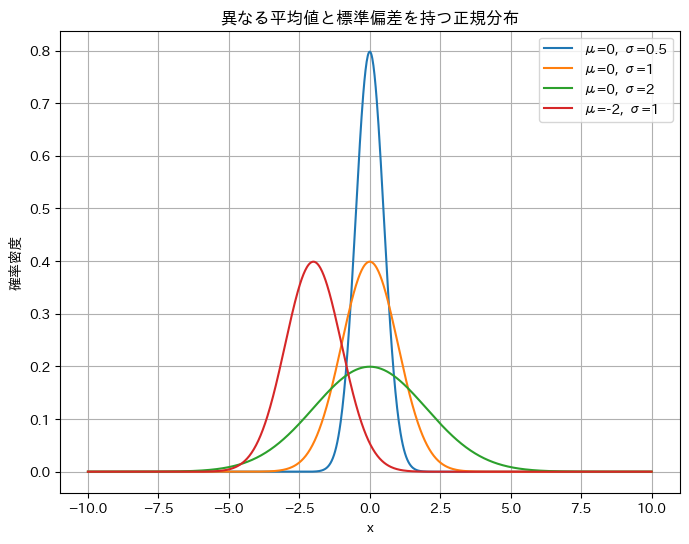

In [19]:
# 平均値と標準偏差のリスト
params = [
    {'mu': 0, 'sigma': 0.5},
    {'mu': 0, 'sigma': 1},
    {'mu': 0, 'sigma': 2},
    {'mu': -2, 'sigma': 1},
]

# xの範囲を設定
x = np.linspace(-10, 10, 1000)

# グラフの描画
plt.figure(figsize=(8, 6))

for param in params:
    mu = param['mu']
    sigma = param['sigma']
    pdf = norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=f"μ={mu}, σ={sigma}")

plt.title('異なる平均値と標準偏差を持つ正規分布')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.legend()
plt.grid(True)
plt.show()

## 中心極限定理
- 小宮さんの資料を参照
    - https://github.com/misya11p/data-econometrics-materials/blob/clt/central_limit_theorem.ipynb


